In [1]:
from keras.datasets import mnist

In [2]:
import numpy as np # for linear algebra calculations
import pandas as pd # for easy data processing
import matplotlib.pyplot as plt

In [19]:
# New Libraries I am working with
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout
from keras.optimizers import Adam, RMSprop
from keras.utils import to_categorical, plot_model
from keras import backend as K

# MNIST Dataset

In [8]:
# Loading the Dataset
(X_train, y_train), (x_test, y_test) = mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


In [10]:
# Count the number of unique train labels
unique, counts = np.unique(y_train, return_counts=True)
print("Train labels: ", dict(zip(unique, counts)))

Train labels:  {0: 5923, 1: 6742, 2: 5958, 3: 6131, 4: 5842, 5: 5421, 6: 5918, 7: 6265, 8: 5851, 9: 5949}


In [12]:
# Count the number of unique test labels
unique, counts = np.unique(y_test, return_counts=True)
print("\nTest labels: ", dict(zip(unique, counts)))


Test labels:  {0: 980, 1: 1135, 2: 1032, 3: 1010, 4: 982, 5: 892, 6: 958, 7: 1028, 8: 974, 9: 1009}


# Data Visualization

In [15]:
# Sample 25 mnist digits from train dataset
indexes = np.random.randint(0, X_train.shape[0], size=25)
images = X_train[indexes]
labels = y_train[indexes]

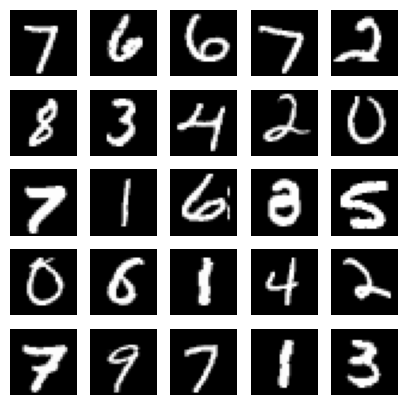

In [18]:
# Plot the 25 mnist digits
plt.figure(figsize=(5,5))
for i in range(len(indexes)):
  plt.subplot(5, 5, i + 1)
  image = images[i]
  plt.imshow(image, cmap='gray')
  plt.axis('off')

plt.show()
plt.savefig("minst-samples.png")
plt.close('all')

# Now we will Design our Model

## Compute the number of labels

In [23]:
# compute the labels
num_labels = len(np.unique(y_train))
num_labels

10

At this point in time, the labels are going from 0 to 9. This sparse scalar representation of labels is not diverse enough for a neural network to predict probabilities per class.

A better format would be through a one-hot vector, a 10 dimensional vector with all elements being 0, except the index of the digit class.

In [27]:
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

## Data Preprocessing



*   In deep learning, data is stored in tensors. The term tensor applies to a scalar (0D tensor), vector (1D tensor), matrix (2D tensor), and a multi-dimensional tensor
*   List item



In [29]:
# image dimensions (assumed square)
image_size = X_train.shape[1]
input_size = image_size * image_size
print(input_size)

784


X_train represents the training set of images. (.shape) returns the dimensions of the array. If (500, 32, 32, 3) is returned, that means there are 500 images, each of size 32x32 pixels, with 3 color channels (RGB).

The first column of this dataset refers to the height of these images.

In [32]:
# resize and normalize
X_train = np.reshape(X_train, [-1, input_size])
X_train = X_train.astype('float32') / 255
x_test = np.reshape(x_test, [-1, input_size])
x_test = x_test.astype('float32') / 255

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In the above, the -1 in the reshape function keeps the number of images unchanged.

InputSize is the total number of pixels in an image, so this is the target shape for each image: a 1D vector of pixels.

## Setting network parameters

In [33]:
# network parameters
batch_size = 128
hidden_units = 256
dropout = 0.45



*   batch_size is the number of data that we will use to update the model's parameters
*   dropout is the dropout rate



## Designing the Model

In Keras, an MLP layer is referred to as Dense, which stands for the densely connected layer. This is standard if we have an unknown dataset.

Both the first and second MLP layers are identical in nature with 256 units each, followed by relu activation and dropout.

256 units are chose since 128, 512, and 1,024 units have lower performance metrics. At 128 units, the network converges quickly, but has a lower test accuracy. The added number units for 512 or 1,024 does not increase the test accuracy significantly.



The main data structure in Keras is the Sequential class, which allows the creation of a basic neural network (this is standard).

The sequential class of the Keras library is a wrapper for the sequential neural network model that Keras.

The model in Keras is considered as a sequence of layers and each of them graudally "distills" the input data to obtain the desired output.

In keras, we can add the required types of layers through the add() method.

In [35]:
# model is a 3-layer MLP with ReLU and dropout after each layer
model = Sequential() # Creates the Sequential Model
model.add(Dense(hidden_units, input_dim=input_size)) # Adding the first dense layer to the model with the number of neurons equal to hidden_units and specifies the dimension of the input to be input_size
model.add(Activation('relu')) # This adds an activation function after the first dense layer. It outputs the input directly if it is positive; otherwise, it outputs zero. This introduces non-linearity to th
model.add(Dropout(dropout))
model.add(Dense(hidden_units))
model.add(Activation('relu'))
model.add(Dropout(dropout))
model.add(Dense(num_labels))
model.add(Activation('softmax'))